# PROYECTO FINAL

La empresa GoGreen Bikesharing se dedica al alquiler de bicicletas y posee datos tales como la cantidad de bicis alquiladas por usuarios registrados, la cantidad de alquileres realizados por usuarios puntuales, y la cantidad total. 

A estos datos se les añadió información meteorológica y el calendario de festivos.

Ahora buscan analizar cuáles son los aspectos que más influyen en la cantidad de bicis que van a alquilar en un día.

In [636]:
# Tratamiento de datos
import numpy as np
import pandas as pd
#import sidetable as stb

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
import sidetable as stb

# Asunciones y Preprocesamiento
from scipy import stats
import math
from scipy.stats import levene
#import researchpy as rp
from sklearn.preprocessing import StandardScaler
import itertools
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols
import researchpy as rp # chi square

#Linear Regresion con Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = False

import pylab as py

In [637]:
df_bike = pd.read_csv("./EDA__parte_3.csv", index_col=0)
df_bike.sample(6)

,casual,registered,cnt,season_encoding,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,temp_interval,temp_interval_ord,hum,hum_interval,hum_interval_ord,windspeed,wind_interval,wind_num_encoding
723,440,573,1013,4,1,12,25,1,2,0,2,11.9,low,2,73.5,high,4,11.304642,low,1
617,1118,6407,7525,4,1,9,10,0,1,1,1,23.9,high,4,50.4,medium,3,17.333771,medium,2
315,1275,2792,4067,4,0,11,12,0,6,0,1,14.6,low,2,55.3,medium,3,14.208154,low,1
440,3155,4681,7836,1,1,3,17,0,6,0,2,21.1,medium,3,75.6,high,4,7.417168,very_low,0
572,1259,5645,6904,3,1,7,27,0,5,1,1,32.0,very_high,5,59.5,high,4,10.250464,low,1
151,513,3461,3974,1,0,6,1,0,3,1,2,31.3,very_high,5,67.7,high,4,13.875164,low,1


---------

# <font color = orange> REGRESIÓN LINEAL MULTIPLE

### Este DF por ahora debe contener nuestra variable respuesta y todas las variables predictivas.

- Vamos a ver la variable respuesta grafico y comprobar la normalidad = 'cnt'
- Vamos a ver graficos de variables predictivas
- Correlacion
- Covarianza
- Vamos a ver si cumplen las asunciones para hacer Anova



    Este dataframe tiene variable respuesta, y las predictoras encoding como tipo objets y numericas que sin encoding.

In [638]:
df= df_bike.copy() # Voy a hacer una copia para no perder los datos por si necesita hacer OPCION 1

In [639]:
df.head()

,casual,registered,cnt,season_encoding,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,temp_interval,temp_interval_ord,hum,hum_interval,hum_interval_ord,windspeed,wind_interval,wind_num_encoding
0,331,654,985,1,0,1,1,0,6,0,2,14.1,low,2,80.6,very_high,5,10.749882,low,1
1,131,670,801,1,0,1,2,0,0,0,2,14.9,low,2,69.6,high,4,16.652113,medium,2
2,120,1229,1349,1,0,1,3,0,1,1,1,8.1,very_low,1,43.7,medium,3,16.636703,medium,2
3,108,1454,1562,2,0,1,4,0,2,1,1,8.2,very_low,1,59.0,high,4,10.739832,low,1
4,82,1518,1600,2,0,1,5,0,3,1,1,9.3,low,2,43.7,medium,3,12.522300,low,1


In [640]:
df.drop(['temp_interval', 'temp_interval_ord','hum_interval','hum_interval_ord', 'wind_interval', 'wind_num_encoding'],axis=1, inplace=True)
    

In [641]:
df.head()

,casual,registered,cnt,season_encoding,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,hum,windspeed
0,331,654,985,1,0,1,1,0,6,0,2,14.1,80.6,10.749882
1,131,670,801,1,0,1,2,0,0,0,2,14.9,69.6,16.652113
2,120,1229,1349,1,0,1,3,0,1,1,1,8.1,43.7,16.636703
3,108,1454,1562,2,0,1,4,0,2,1,1,8.2,59.0,10.739832
4,82,1518,1600,2,0,1,5,0,3,1,1,9.3,43.7,12.522300


In [642]:
df.info() #Correcto tenemos que volver a cambiar el tipo de cada columna 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   casual           730 non-null    int64  
 1   registered       730 non-null    int64  
 2   cnt              730 non-null    int64  
 3   season_encoding  730 non-null    int64  
 4   yr               730 non-null    int64  
 5   mnth             730 non-null    int64  
 6   day              730 non-null    int64  
 7   holiday          730 non-null    int64  
 8   weekday          730 non-null    int64  
 9   workingday       730 non-null    int64  
 10  weathersit       730 non-null    int64  
 11  temp             730 non-null    float64
 12  hum              730 non-null    float64
 13  windspeed        730 non-null    float64
dtypes: float64(3), int64(11)
memory usage: 85.5 KB


In [643]:
df.columns

Index(['casual', 'registered', 'cnt', 'season_encoding', 'yr', 'mnth', 'day',
       'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum',
       'windspeed'],
      dtype='object')

    Se ha cambiado las que tienen encoding a "category"

In [644]:
df['season_encoding'] = df['season_encoding'].astype('category')  
df['yr'] = df['yr'].astype('category')  
df['mnth'] = df['mnth'].astype('category')  
df['day'] = df['day'].astype('category')  
df['holiday'] = df['holiday'].astype('category')  
df['weekday'] = df['weekday'].astype('category')  
df['workingday'] = df['workingday'].astype('category')  
df['weathersit'] = df['weathersit'].astype('category')  

### Variable respuesta - NORMALIDAD - SHAPIRO

    Nuestra variable respuesta es 'cnt', queremos ver cuantas reservas general según las variables predictoras.
    Parece que tenemos una distribución normal de nuestros datos.


| Test Shapiro  |  Resultado | Conclusión |
|---|---|---|
|  p-value > 0.05 | No significativo   | Datos  Normales|
|p-value < 0.05| Significativo| Datos No Normales |

ShapiroResult(statistic=0.9802490472793579, pvalue=2.313480784721378e-08)


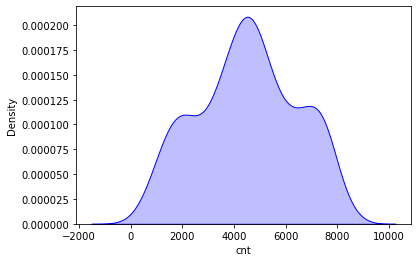

In [645]:
sns.distplot(
    df_bike.cnt, 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

print(stats.shapiro(df_bike["cnt"])) # Los datos no son normales

    Intentamos normalizar los datos con boxcox, pero el resultado es el mismo, no se procede.

In [646]:
# df_bike['cnt'], lambda_ajustada = stats.boxcox(df_bike['cnt'])
# print(stats.shapiro(df_bike["cnt"]))

### Variables predictoras CATEGORICAS - GRAFICO

    Estas son nuestras variables categoricas

In [647]:
categoricas = df.select_dtypes(include='category')
categoricas.head(1)

,season_encoding,yr,mnth,day,holiday,weekday,workingday,weathersit
0,1,0,1,1,0,6,0,2


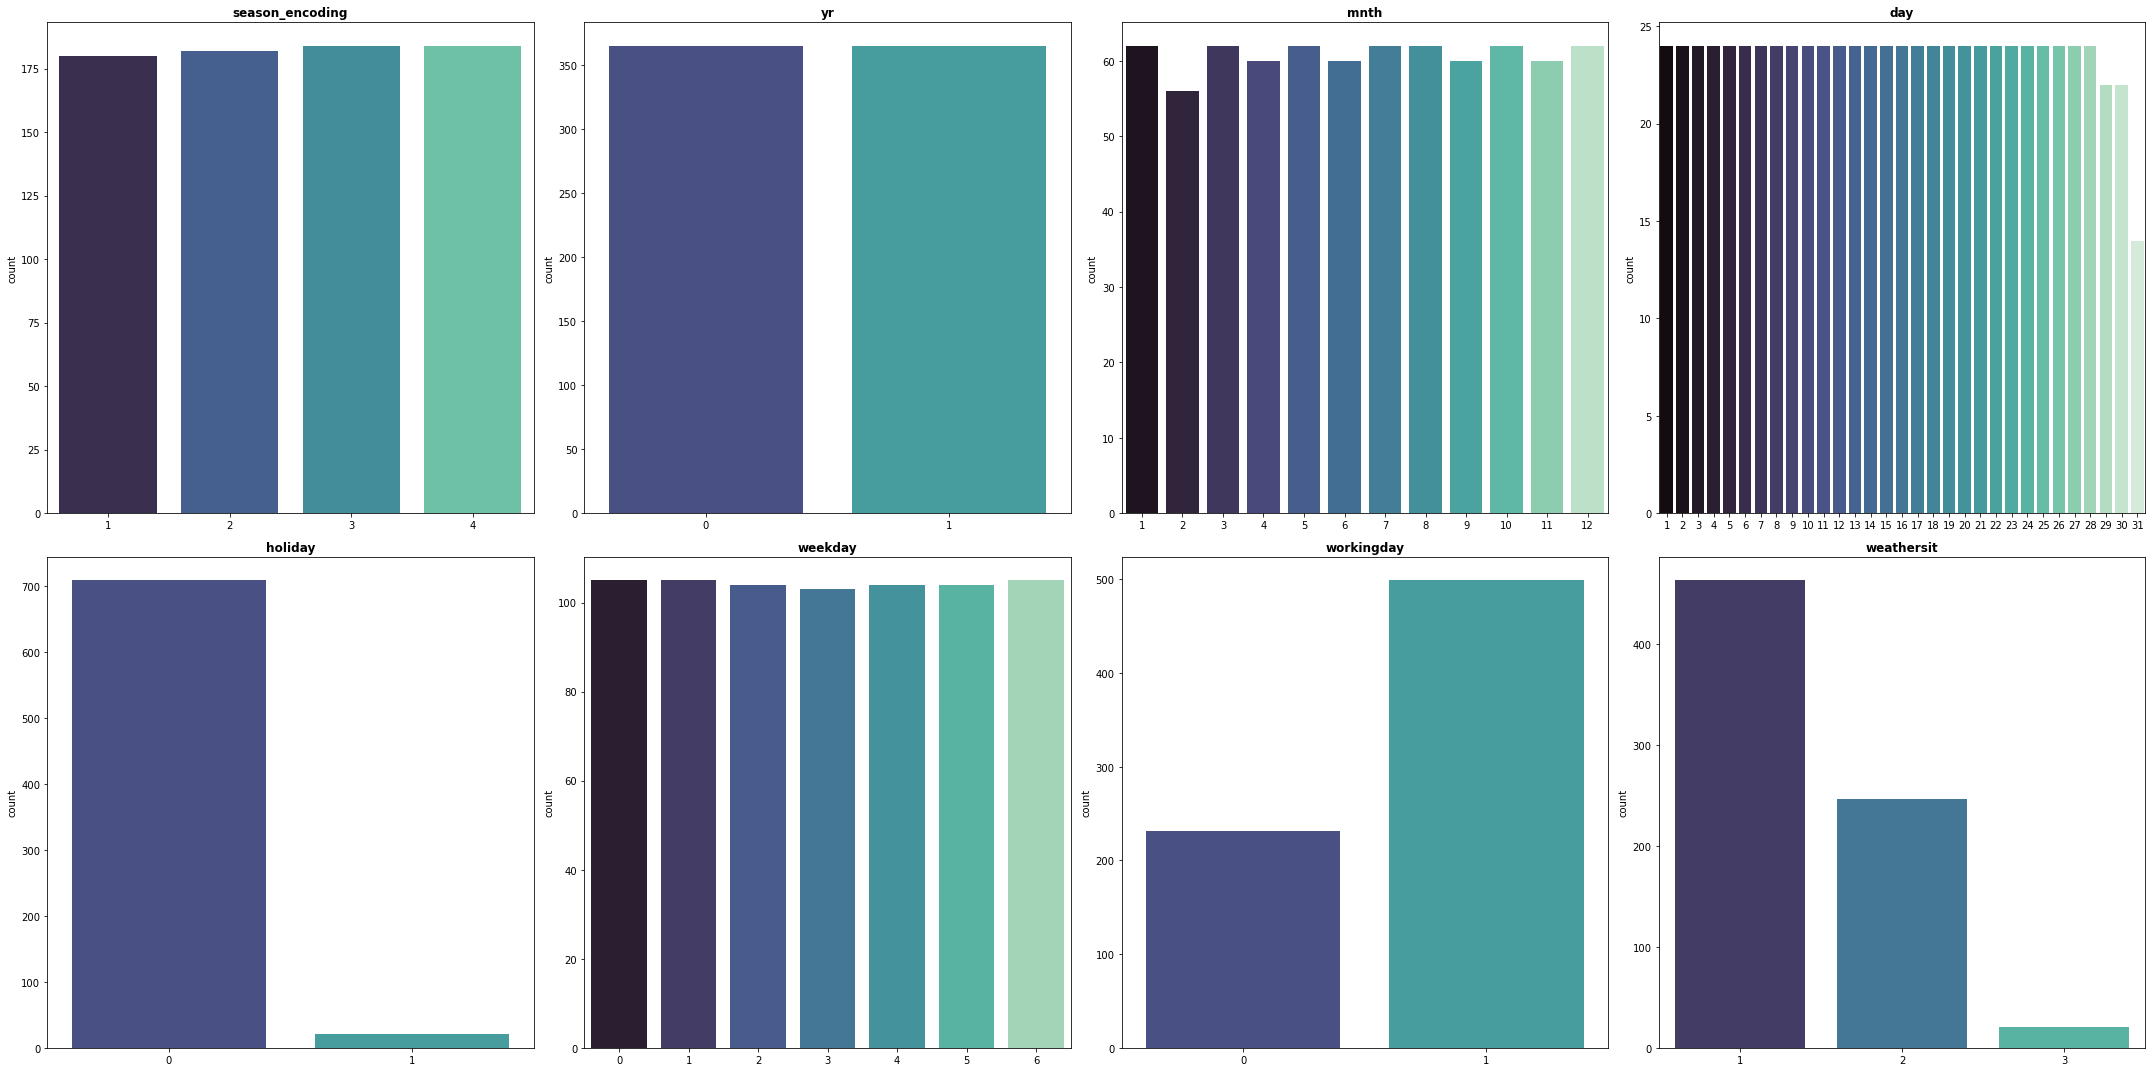

In [648]:
# Gráfico de relación entre variables predictoras y la variable a predecir CATEGORICAS
# ===================================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (30, 15))

axes = axes.flat

columnas_object = df.select_dtypes(include = "category").columns

for i, colum in enumerate(columnas_object):
    sns.countplot(df[colum], ax=axes[i], palette="mako")
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
fig.tight_layout();



### Variables predictoras NUMERICAS - GRAFICO

    Estas son nuestras variables numéricas

In [649]:
numericas = df.select_dtypes(include = np.number)
numericas.head(1)

,casual,registered,cnt,temp,hum,windspeed
0,331,654,985,14.1,80.6,10.749882


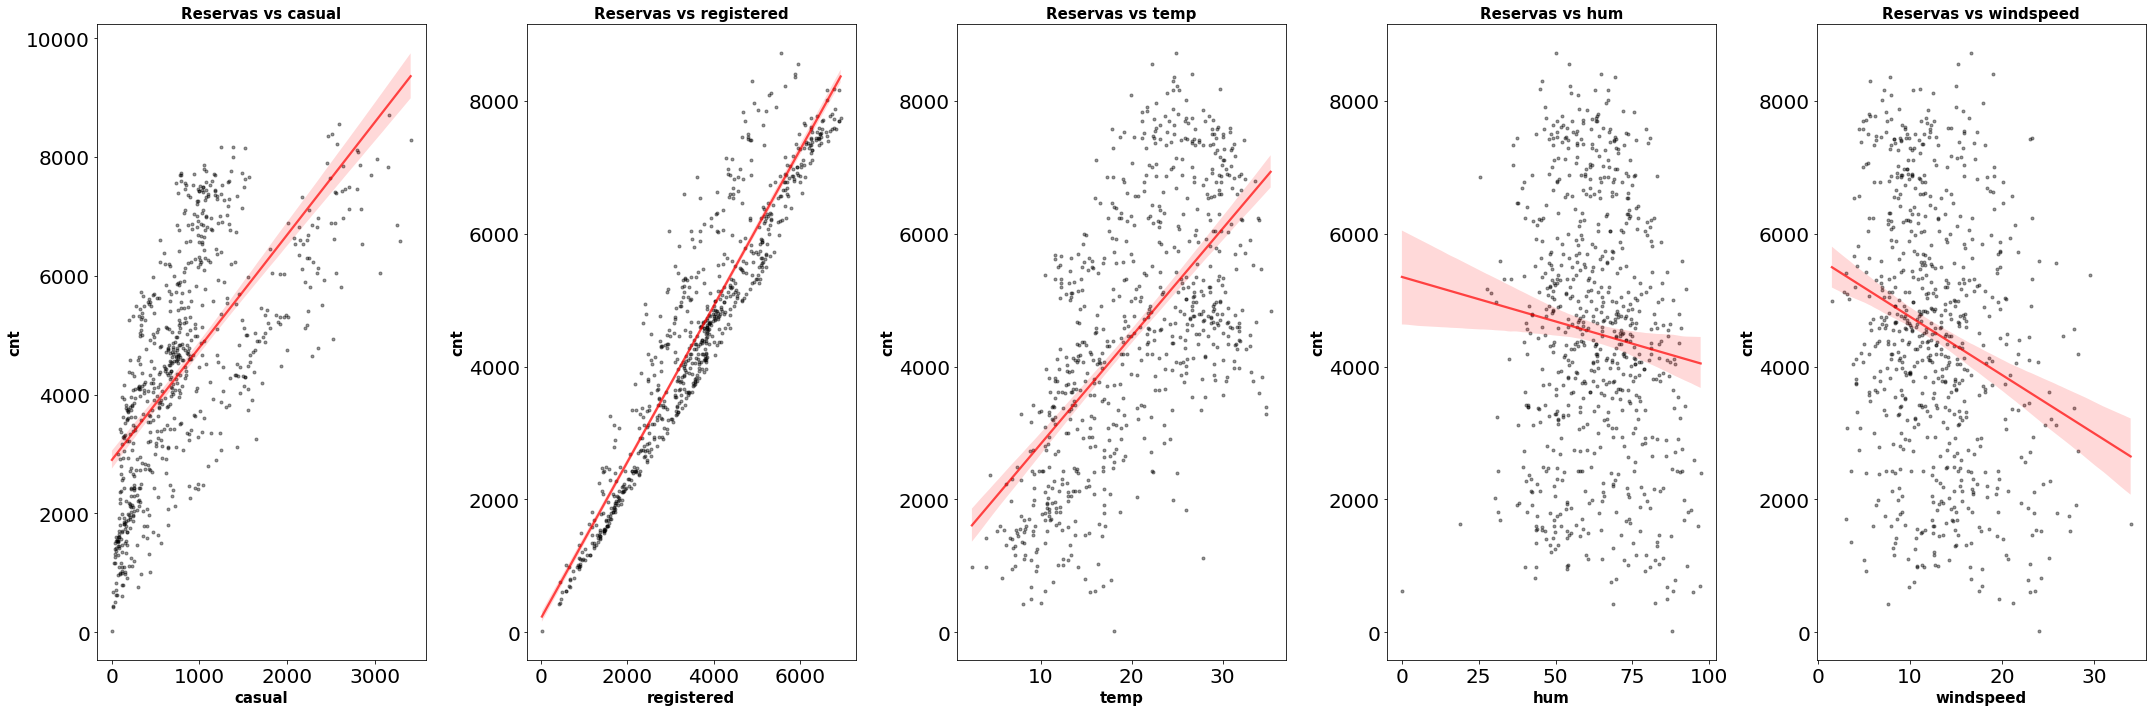

In [650]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (30, 10))

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("cnt") # excluimos nuestra variable respuesta. (No la necesitamos ahora

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["cnt"], 
        color = "black", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Reservas vs {colum}", fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel(colum,  fontsize = 15, fontweight = "bold")
    axes[i].set_ylabel("cnt", fontsize = 15, fontweight = "bold")
    
fig.tight_layout();

### Vamos a comprobar la relación entre todas las variables

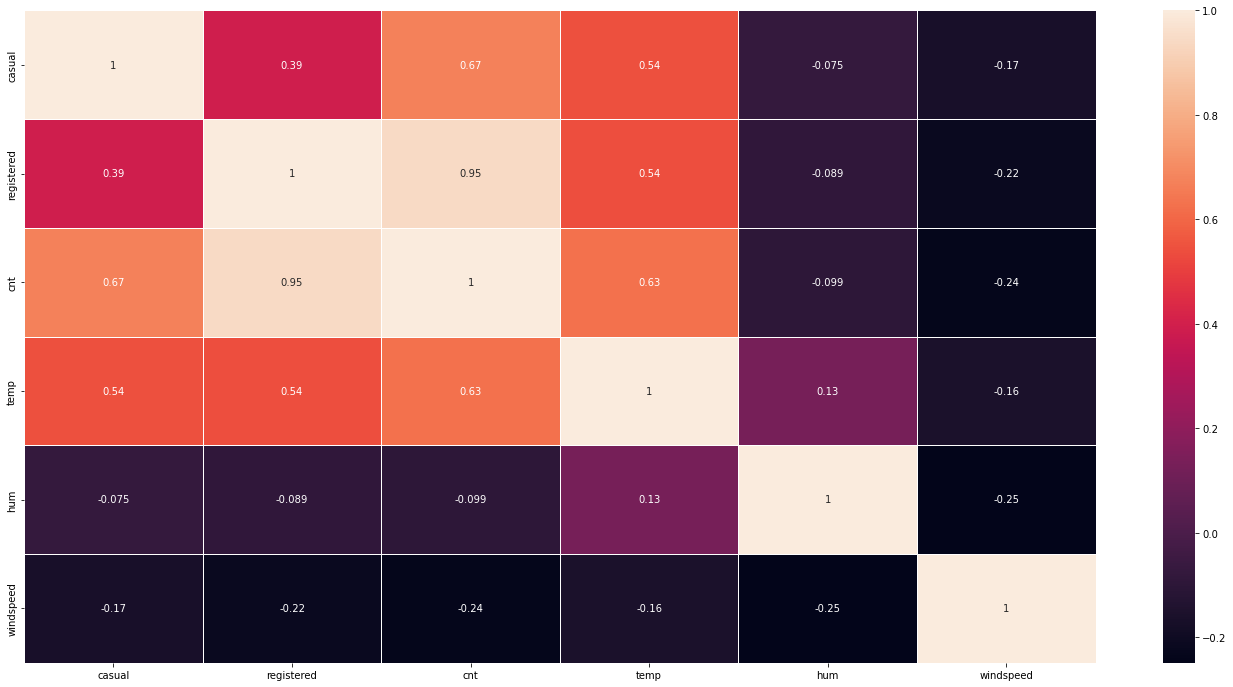

In [651]:
plt.figure(figsize = (24, 12))

corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

    CORRELACIÓN
        Vamos a ver la correlación entre las variables predictoras y que relación tienen tb con la respuesta.
        intervalo [-1 y 1]
	    r= 1 corr perfecta positiva (aumenta una , la otra tb aumenta)
	    r =0 no hay correlación
 	    r= -1 corr perfecta negativa (una aumenta y la otra disminuye)

    Correlación con respecto a la columna "cnt"

In [652]:
correlation = df.corr()['cnt'].abs().sort_values(ascending = False) #correlación solo te enseña numéricas, Pearson RESPECTO A LA COLUMNA "cnt"
correlation

cnt           1.000000
registered    0.945411
casual        0.672123
temp          0.627003
windspeed     0.235132
hum           0.098502
Name: cnt, dtype: float64

    Correlación entre todas las numéricas

In [653]:
numericas.corr() 

,casual,registered,cnt,temp,hum,windspeed
casual,1.000000,0.394137,0.672123,0.542824,-0.075259,-0.167995
registered,0.394137,1.000000,0.945411,0.539345,-0.089140,-0.217914
cnt,0.672123,0.945411,1.000000,0.627003,-0.098502,-0.235132
temp,0.542824,0.539345,0.627003,1.000000,0.128716,-0.158367
hum,-0.075259,-0.089140,-0.098502,0.128716,1.000000,-0.248582
windspeed,-0.167995,-0.217914,-0.235132,-0.158367,-0.248582,1.000000


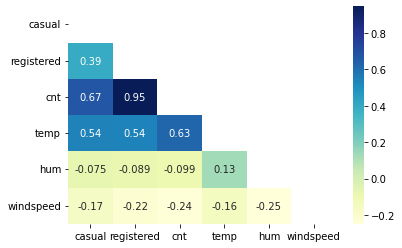

In [654]:
mask = np.triu(np.ones_like(numericas.corr(), dtype = np.bool))
sns.heatmap(numericas.corr(), 
           cmap = "YlGnBu", 
           annot = True, 
           mask =mask);


### Vamos a comprobar la relación que hay entre numericas

In [655]:
numericas2 = df.select_dtypes(include = np.number).drop("cnt", axis = 1)

    COVARIANZA
    ¿Ambas variables aumentan o disminuyen en la misma dirección o cuando una aumenta la otra disminuye?
        S> 0 COVARIANZA POSITIVA : Todos aumentan misma dirección ( a grandes valores de X, grandes valores de Y)
        S = 0 NO HAY RELACIÓN LINEAL
        S< 0 COVARIANZA NEGATIVA: Aumenta una y disminuye la otra (a grandes valores de X , pequeños valores de Y)

In [656]:
numericas2.cov() # vamos a ver si existe colinealidad entre mas medias de las variables predictoras

,casual,registered,temp,hum,windspeed
casual,471254.618141,4.220196e+05,2797.280226,-735.582158,-599.212506
registered,422019.595513,2.432847e+06,6314.994264,-1979.593043,-1766.034199
temp,2797.280226,6.314994e+03,56.350559,13.757125,-6.176868
hum,-735.582158,-1.979593e+03,13.757125,202.717828,-18.389602
windspeed,-599.212506,-1.766034e+03,-6.176868,-18.389602,26.996761


----

### Comprobar Outliers en este modelo

In [657]:
def detectar_outliers(lista_columnas, dataframe): 
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    return dicc_indices 

In [658]:
lista_columnas = list(numericas.columns)
lista_columnas

['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']

     Son pocos Outliers que no influyen en demasiado lo cambiamos por la mediana

In [659]:
ind = detectar_outliers(lista_columnas, df)
print(ind)

{'casual': [148, 183, 184, 196, 246, 281, 440, 446, 454, 455, 461, 468, 469, 475, 489, 496, 503, 504, 510, 511, 512, 517, 518, 524, 531, 532, 538, 539, 549, 559, 567, 580, 594, 608, 609, 616, 622, 629, 630, 636, 643, 657, 664, 679], 'hum': [49, 68], 'windspeed': [44, 49, 93, 94, 292, 382, 407, 420, 431, 432, 449, 665, 720]}


In [660]:
for key, values in ind.items():
    median = df[key].median()
     
    if key == "hum" or key == 'windspeed':
        for i in values: 
            df.loc[i,key] = median
    else:
        pass

# Comprobación de las asunciones - Las variables predictoras deben cumplir: Homocedasteidad, Independencia 

### ASUNCIÓN DE NORMALIDAD  

    Ya la hemos comprobado y nuestros datos NO son normales.

- Visualmente
- Test de Shapiro


| Test Shapiro  |  Resultado | Conclusión |
|---|---|---|
|  p-value > 0.05 | No significativo   | Datos  Normales|
|p-value < 0.05| Significativo| Datos No Normales |

In [661]:
stats.shapiro(df["cnt"]) # El p-value< 0.05 Quiere decir que la distribución es No es NORMAL

ShapiroResult(statistic=0.9802490472793579, pvalue=2.313480784721378e-08)

### ASUNCIÓN DE HOMOCEDASTICIDAD (Levene)

Las varianzas no difieren entre las distintas categorías de nuestros datos


| Test Levene  |  Resultado | Conclusión   |
|---|---|---|
|  p-value > 0.05 | No significativo   | Cumple asunción, tienen varianzas similares|
|p-value < 0.05| Significativo| No cumple asunción, no tienen varianzas similares |

    - Variables Categoricas -

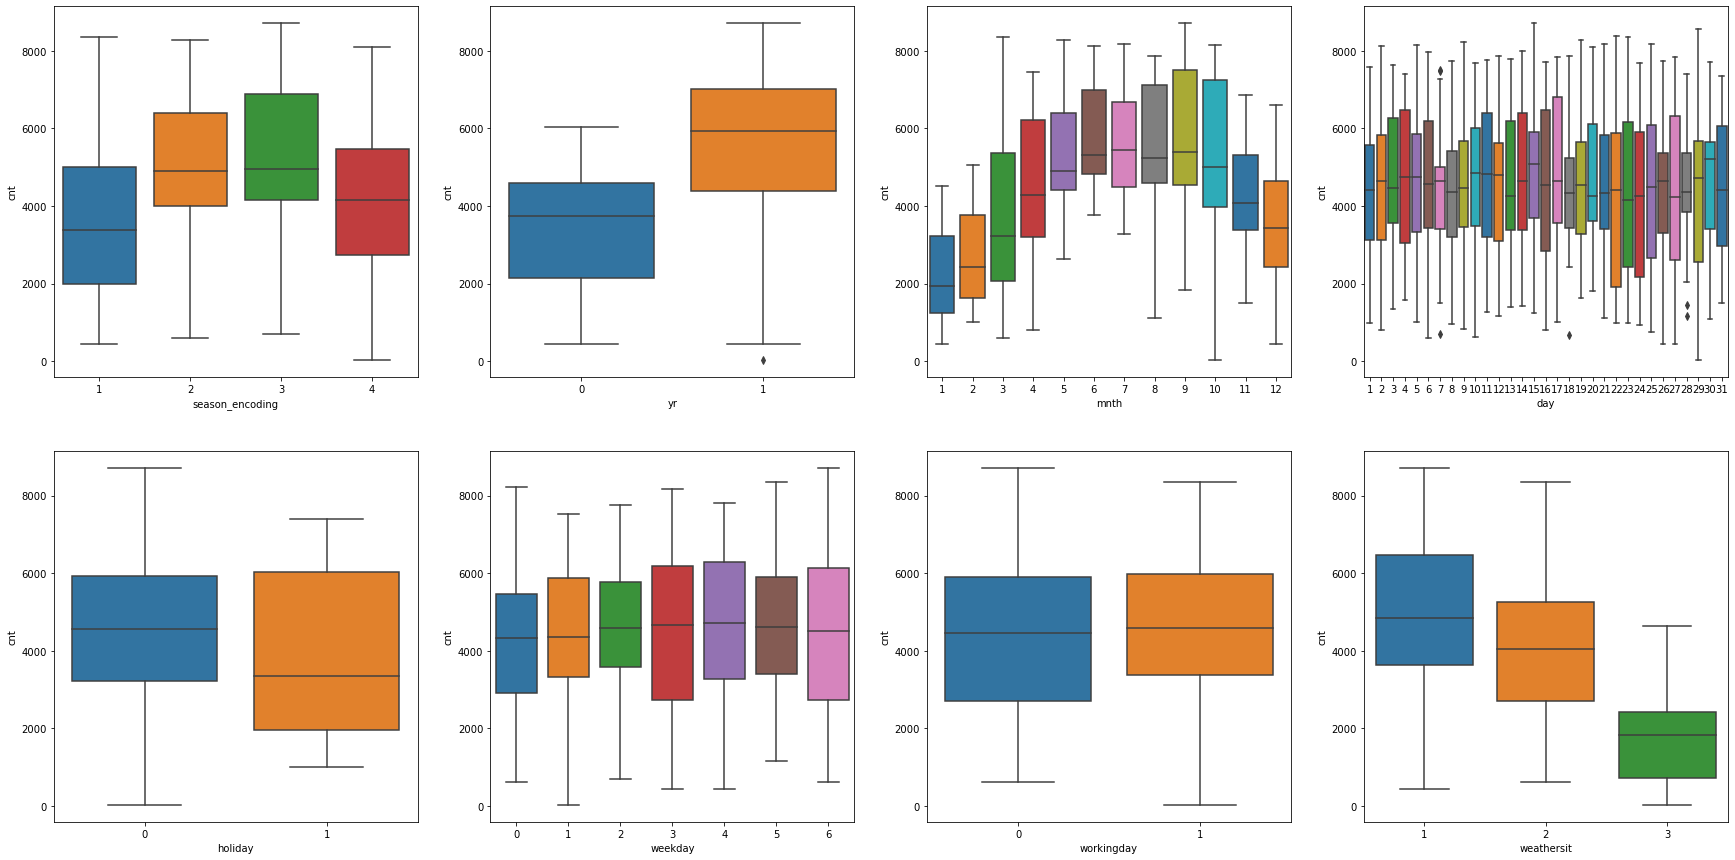

In [662]:
fig, axes = plt.subplots(nrows = 2, ncols = 4 ,figsize = (30, 15))

axes = axes.flat

colum_cat = df.select_dtypes(include = ['category']).columns

for i, col in enumerate(colum_cat):
    sns.boxplot(
        x = col,
        y = 'cnt',
        data = df,
        palette = 'tab10',
        ax = axes[i]

    )

                                                        --TEST LEVENE PARA CADA VARIABLE CATEGORICA PREDICTORA--

In [663]:
#Para desglosar cada una de las columnas, hacemos test de levene a cada una
def datos_test_levene (columna, df):
    valores = df[columna].unique()
    d = {}

    for x in valores:
        d['{0}'.format(x)] = df[df[columna] == x]['cnt']
    return d

In [664]:
# 8 variables categoricas predictoras
season = datos_test_levene('season_encoding', df)
year = datos_test_levene('yr', df)
month = datos_test_levene('mnth', df)
day = datos_test_levene('day', df)
holiday = datos_test_levene('holiday', df)
weekday =  datos_test_levene('weekday', df)
workingday = datos_test_levene('workingday', df)
weathersit = datos_test_levene('weathersit', df)

        --NO CUMPLEN--

In [665]:
levene_temp_interval = stats.levene(year['0'], year['1'], center='median')
levene_temp_interval # NO CUMPLE

LeveneResult(statistic=13.553593496753745, pvalue=0.0002489869491449798)

In [666]:
levene_workingday = stats.levene(workingday['0'], workingday['1'], center='median')
levene_workingday # NO CUMPLE

LeveneResult(statistic=4.460702577469021, pvalue=0.03502326959654844)

In [667]:
levene_month = stats.levene(month['1'], month['2'],month['3'],month['4'],month['5'],month['6'],month['1'],month['7'],month['1'],month['8'],month['9'],month['10'],month['11'],month['12'], center='median')
levene_month # NO CUMPLE

LeveneResult(statistic=5.787944098760116, pvalue=2.73789175494516e-10)

    ---SI CUMPLE---

In [668]:
levene_season = stats.levene(season['1'], season['2'], season['3'], season['4'], center='median')
levene_season # SI CUMPLE

LeveneResult(statistic=1.7590626071065214, pvalue=0.15360584747469838)

In [669]:
levene_day = stats.levene(day['1'], day['2'],day['3'],day['4'],day['5'],day['6'],day['1'],day['7'],day['1'],day['8'],day['9'],day['10'],day['11'],day['12'],
 day['13'], day['14'],day['15'],day['16'],day['17'],day['18'],day['19'],day['20'],day['21'],day['22'],day['23'],day['24'],day['25'],day['26'],
 day['27'], day['28'],day['29'],day['30'],day['31'],center='median')
levene_day # SI CUMPLE

LeveneResult(statistic=0.5456780499569595, pvalue=0.9815493458112784)

In [670]:
levene_holiday = stats.levene(holiday['0'], holiday['1'], center='median')
levene_holiday # SI CUMPLE

LeveneResult(statistic=0.7261499110317795, pvalue=0.39441424379573353)

In [671]:
levene_weekday = stats.levene(weekday['0'], weekday['1'],weekday['2'],weekday['3'],weekday['4'],weekday['5'],weekday['6'], center='median')
levene_weekday # SI CUMPLE

LeveneResult(statistic=1.496581827336433, pvalue=0.17647662349169893)

In [672]:
levene_weathersit = stats.levene(weathersit['1'], weathersit['2'], weathersit['3'],center='median')
levene_weathersit # SI CUMPLE

LeveneResult(statistic=2.981948873358019, pvalue=0.05131438057388725)

    Numéricas

In [673]:

# creamos un diccionario para almacenar los resultados de los test
resultados = {}

# seleccionamos solo las columnas numéricas y eliminamos la columna de precio
numericas_col = df.select_dtypes(include = np.number).drop("cnt", axis = 1).columns

#iteremos por la lista de las columnas numéricas
for col in numericas_col:
    # calculamos el p-valor de test
    statistic, p_val = levene(df[col], df.cnt, center='median')
    # lo almacenamos en el charges
    resultados[col] = p_val

                    --  NO CUMPLEN NINGUNA --

In [674]:
resultados 

{'casual': 3.031094721085453e-106,
 'registered': 3.756413456870291e-09,
 'temp': 2.483823693494982e-220,
 'hum': 2.4852444623529654e-219,
 'windspeed': 6.996761844872213e-221}

    Aplicamos log a las variables numéricas, para ver si podemos transformar y que alguna o todas puedan cumplir la asunción.  NO IMPLICA CAMBIO

In [675]:
#hemos intentado hacer logaritmonimos las variables categoricas .    NO nos funciona.

# df['casual'] = df['casual'].apply(lambda x: np.log(x) if x != 0 else 0)
# df['registered'] = df['registered'].apply(lambda x: np.log(x) if x != 0 else 0)
# df['temp'] = df['temp'].apply(lambda x: np.log(x) if x != 0 else 0)
# df['hum'] = df['hum'].apply(lambda x: np.log(x) if x != 0 else 0)
# df['windspeed'] = df['windspeed'].apply(lambda x: np.log(x) if x != 0 else 0)

    Aplicamos raiz cuadrada a las variables numéricas, para ver si podemos transformar y que alguna o todas puedan cumplir la asunción.

In [676]:
# df["temp"]= df["temp"].apply(lambda x: math.sqrt(x))
# df["hum"]= df["hum"].apply(lambda x: math.sqrt(x))
# df["windspeed"]= df["windspeed"].apply(lambda x: math.sqrt(x))

In [677]:

# # creamos un diccionario para almacenar los resultados de los test
# resultados2 = {}

# # seleccionamos solo las columnas numéricas y eliminamos la columna de precio
# numericas_col = df.select_dtypes(include = np.number).drop(["cnt","casual","registered"],  axis = 1).columns

# #iteremos por la lista de las columnas numéricas
# for col in numericas_col:
#     # calculamos el p-valor de test
#     statistic, p_val = levene(df[col], df.cnt, center='median')
#     # lo almacenamos en el charges
#     resultados2[col] = p_val

## Asunción independencia (Chi-Cuadrado)


| Test Independencia |  Resultado | Conclusión   |
|---|---|---|
|  p-value > 0.05 | No significativo   | Cumple asunción, tienen varianzas similares|
|p-value < 0.05| Significativo| No cumple asunción, no tienen varianzas similares |

In [678]:
columnas = df.columns

In [679]:
combinaciones = list(itertools.combinations(columnas, 2))
combinaciones[13]

('registered', 'cnt')

In [680]:
combinaciones = list(itertools.combinations(columnas, 2))
combinaciones_cnt= combinaciones[25:36]#, combinaciones[1], combinaciones[13] # ya solo te muestra con respecto a "cnt"
combinaciones_cnt

[('cnt', 'season_encoding'),
 ('cnt', 'yr'),
 ('cnt', 'mnth'),
 ('cnt', 'day'),
 ('cnt', 'holiday'),
 ('cnt', 'weekday'),
 ('cnt', 'workingday'),
 ('cnt', 'weathersit'),
 ('cnt', 'temp'),
 ('cnt', 'hum'),
 ('cnt', 'windspeed')]

    Test Chi Cuadrado
    Kramer: 
    de 0-0,1: no hay independencia
    de 0,1 - 0,3 independencia baja
    0,3 a 0,5 independencia moderada
    0,5+ independencia alta


In [681]:
for par in combinaciones_cnt:
    crosstab, test_results, expected = rp.crosstab(df[par[0]], df[par[1]],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
    print("---------------------------------", par[0], par[1], "---------------------------------")
    print(test_results) #todas son independientes

--------------------------------- cnt season_encoding ---------------------------------
                   Chi-square test    results
0  Pearson Chi-square ( 2082.0) =   2089.9375
1                       p-value =      0.4470
2                    Cramer's V =      0.9769
--------------------------------- cnt yr ---------------------------------
                  Chi-square test   results
0  Pearson Chi-square ( 694.0) =   706.0000
1                      p-value =     0.3676
2                   Cramer's V =     0.9834
--------------------------------- cnt mnth ---------------------------------
                   Chi-square test    results
0  Pearson Chi-square ( 7634.0) =   7636.3074
1                       p-value =      0.4904
2                    Cramer's V =      0.9752
--------------------------------- cnt day ---------------------------------
                    Chi-square test     results
0  Pearson Chi-square ( 20820.0) =   20849.4399
1                        p-value =       0.4

    --Si son independientes--

# ANOVA

    Ya podemos pasar a la ANOVA después de comprobar si las variables predictoras cumplen las asunciones

In [682]:
df.columns

Index(['casual', 'registered', 'cnt', 'season_encoding', 'yr', 'mnth', 'day',
       'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum',
       'windspeed'],
      dtype='object')

    No añadimos "registered"

In [683]:
lm = ols('cnt ~  casual + season_encoding + yr + mnth + day + holiday + weekday + workingday + weathersit + temp + hum +  windspeed' , data=df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
season_encoding,3.0,2.965983e+08,9.886610e+07,262.807410,9.232468e-113
yr,1.0,8.869095e+08,8.869095e+08,2357.596632,8.943830e-222
mnth,11.0,7.803896e+08,7.094451e+07,188.585804,6.726230e-197
day,30.0,6.263900e+07,2.087967e+06,5.550266,3.255271e-18
holiday,1.0,8.356054e+06,8.356054e+06,22.212193,2.969398e-06
weekday,6.0,1.555021e+07,2.591702e+06,6.889303,4.102127e-07
workingday,1.0,1.100045e+06,1.100045e+06,2.924157,8.772510e-02
weathersit,2.0,1.740145e+08,8.700727e+07,231.284091,3.964787e-77
casual,1.0,2.338266e+08,2.338266e+08,621.561475,1.318961e-97
temp,1.0,1.248884e+07,1.248884e+07,33.198030,1.268586e-08


In [684]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     113.7
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          3.36e-307
Time:                        16:16:33   Log-Likelihood:                -5690.9
No. Observations:                 730   AIC:                         1.150e+04
Df Residuals:                     671   BIC:                         1.177e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              356.6242    237.055      1.504      0.133    -108.835     822.084
season_encoding[T.2]  -112.2496    132.729     -0.846      0.398    -372.864     148.365
season_encoding[T.3]   170.1781    135.956      1.252      0.211     -96.772     437.128
season_encoding[T.4]  -863.7501    134.176     -6.437      0.000   -1127.206    -600.294
yr[T.1]               1618.6137     50.344     32.151      0.000    1519.764    1717.464
mnth[T.2]              167.1802    115.594      1.446      0.149     -59.789     394.150
mnth[T.3]              357.7042    124.355      2.876      0.004     113.532     601.877
mnth[T.4]              725.6083    162.872      4.455      0.000     405.808    1045.409
mnth[T.5]              965.1883    183.955      5.247      0.000     603.991    1326.385
mnth[T.6]              984.5038    206.093      4.777      0.000     579.838    1389.169
mnth[T.7]              475.4431    238.019      1.998      0.046       8.091     942.795
mnth[T.8]              763.8200    224.378      3.404      0.001     323.253    1204.387
mnth[T.9]             1328.8584    201.801      6.585      0.000     932.620    1725.097
mnth[T.10]            2000.1314    171.104     11.690      0.000    1664.168    2336.095
mnth[T.11]            1695.6418    150.259     11.285      0.000    1400.608    1990.676
mnth[T.12]            1394.2986    144.184      9.670      0.000    1111.193    1677.405
day[T.2]                74.7387    177.810      0.420      0.674    -274.393     423.870
day[T.3]                93.2341    178.114      0.523      0.601    -256.495     442.963
day[T.4]               199.8793    223.082      0.896      0.371    -238.143     637.902
day[T.5]               230.2166    222.135      1.036      0.300    -205.947     666.380
day[T.6]               264.3795    222.928      1.186      0.236    -173.341     702.100
day[T.7]              -187.9049    224.193     -0.838      0.402    -628.108     252.299
day[T.8]              -150.6411    223.709     -0.673      0.501    -589.896     288.614
day[T.9]              -108.5017    223.168     -0.486      0.627    -546.693     329.690
day[T.10]             1045.1206    223.163      4.683      0.000     606.938    1483.303
day[T.11]             1117.8522    222.726      5.019      0.000     680.528    1555.176
day[T.12]             1054.7443    223.202      4.726      0.000     616.485    1493.003
day[T.13]              304.5042    196.799      1.547      0.122     -81.911     690.919
day[T.14]              268.5003    196.151      1.369      0.172    -116.644     653.645
day[T.15]              442.4931    196.707      2.250      0.025      56.258     828.728
day[T.16]              495.4151    196.838      2.517      0.012     108.922     881.908
day[T.17]              498.9497    197.102      2.531    

# VIF - Para comprobar si hay o no multicolinealidad (Correlación alta entre dos v. predictoras), podemos averiguar si eliminar o no ésta variable.

Vif = 1 No existe corr entre una variable predictora y el resto

Vif = 1-5 Correlación moderada

Vif= +5 Correlación severa (Puede que se deba eliminar esa variable)

In [685]:
def get_VIF(dataframe, target):
        X = add_constant(dataframe.loc[:, dataframe.columns != target])
        seriesObject = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])] , index=X.columns,).sort_values(ascending= False)
        return seriesObject

In [686]:
get_VIF(df,'cnt')

const              59.127926
registered          5.257165
casual              3.499429
workingday          3.048632
yr                  2.504376
temp                2.485197
hum                 2.024499
weathersit          1.998636
mnth                1.976746
season_encoding     1.609012
windspeed           1.177147
holiday             1.097696
day                 1.053979
weekday             1.041385
dtype: float64

In [687]:
get_VIF(df.drop(columns=['registered']),'cnt')

const              57.840084
casual              3.132840
temp                2.074269
workingday          2.057692
hum                 2.018376
weathersit          1.883178
mnth                1.713850
season_encoding     1.602255
yr                  1.161900
windspeed           1.153558
holiday             1.096312
day                 1.049885
weekday             1.036896
dtype: float64

# Regresion Lineal

    Prueba con los datos tal cualen DF

In [688]:
# df.head(2)

In [689]:
# lo primero que hacemos es definir cual es nuestra variable Y y nuestras variables X
# X = df.drop(['cnt', 'registered','casual'],axis =1)
# y = df['cnt']

In [690]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 42)
# lr = LinearRegression()
# lr.fit(X_train, y_train)
# y_pred_train = lr.predict(X_train)
# y_pred_test = lr.predict(X_test)

In [691]:
# def metricas(y_test, y_train, y_test_pred, y_train_pred):
    
    
#     resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
#                 'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
#                 'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
#                 'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
#                  "set": ["test", "train"]}
#     df = pd.DataFrame(resultados)
#     return df
    

In [692]:
# results = metricas(y_test, y_train, y_pred_test, y_pred_train)
# results.style.background_gradient(cmap='coolwarm')
# results

    Prueba Estandarizando las variables numéricas

In [693]:
df_standardized = df.copy()

In [694]:
numericas2 = df_standardized.select_dtypes(include = np.number)

In [695]:
st = MinMaxScaler()
x_tranformadas = pd.DataFrame(st.fit_transform(numericas2))
x_tranformadas.columns = numericas2.columns
df[x_tranformadas.columns] = x_tranformadas
df.head()

,casual,registered,cnt,season_encoding,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,hum,windspeed
0,0.096538,0.091539,0.110792,1,0,1,1,0,6,0,2,0.355623,0.768802,0.388102
1,0.037852,0.093849,0.089623,1,0,1,2,0,0,0,2,0.379939,0.615599,0.635752
2,0.034624,0.174560,0.152669,1,0,1,3,0,1,1,1,0.173252,0.254875,0.635105
3,0.031103,0.207046,0.177174,2,0,1,4,0,2,1,1,0.176292,0.467967,0.387681
4,0.023474,0.216286,0.181546,2,0,1,5,0,3,1,1,0.209726,0.254875,0.462471


In [696]:
x2 = df_standardized.drop(['cnt','registered'] ,axis =1)
y2 = df_standardized['cnt']

In [697]:
X_train, X_test, y_train, y_test = train_test_split(x2, y2, train_size   = 0.8, random_state = 42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [698]:
def metricas(y_test, y_train, y_test_pred, y_train_pred):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    return df

In [699]:
results = metricas(y_test, y_train, y_pred_test, y_pred_train)
results.style.background_gradient(cmap='coolwarm')
results

# El 87% de la variación de mis datos está explicado con este modelo,está explicado por las variables que hemos escogido. 
# No es capaz de explicar el 13%

# Hay un error de predición de 69 alquileres.

,MAE,MSE,RMSE,R2,set
0,472.039961,389542.902888,624.133722,0.886193,test
1,518.785676,481625.313450,693.992301,0.873778,train


    El error cuadrático medio (RMSE) mide la cantidad de error que hay entre dos conjuntos de datos.

    El R-cuadrado es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. 
    El R-cuadrado siempre está entre 0 y 100%:
    0% indica que el modelo no explica ninguna porción de la variabilidad de los datos de respuesta en torno a su media.
    100% indica que el modelo explica toda la variabilidad de los datos de respuesta en torno a su media.

----

    Residuos son valores reales frente a los predichos: valor real menos valor predicho

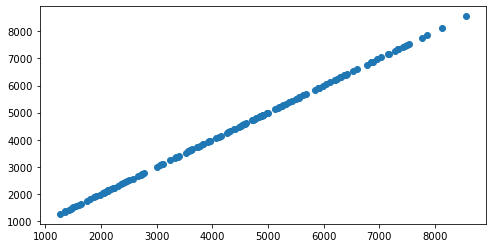

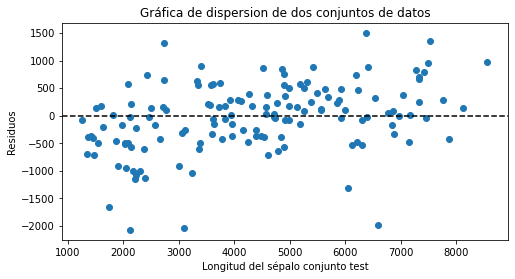

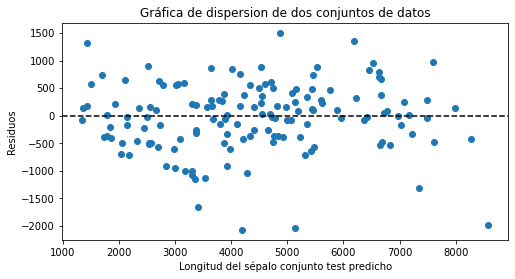

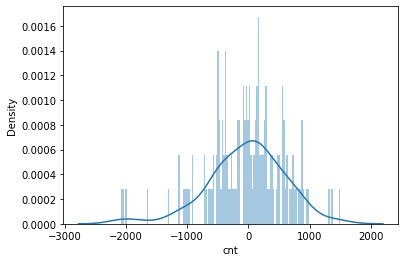

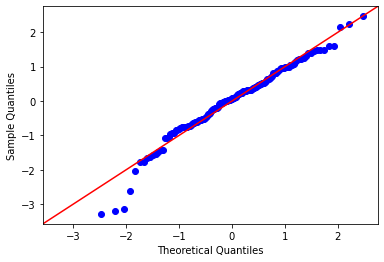

In [700]:
# Aquí comienza la resolucion del ejercicio 1
residuals = (y_test - y_pred_test)

# 1. Linealidad

plt.figure(figsize =(8,4))
plt.scatter(x=y_test , y=y_test)
plt.show()

# 2. Independencia

fig,ax = plt.subplots(figsize= (8,4))
plt.scatter(x=y_test , y=residuals)
plt.axline((float(min(y_pred_test)),0),(float(max(y_pred_test)),0),color="black",linestyle= '--') 
plt.title('Gráfica de dispersion de dos conjuntos de datos')
ax.set_xlabel('Longitud del sépalo conjunto test')
ax.set_ylabel('Residuos')
plt.show()

# 3. Homocedasticidad

fig,ax = plt.subplots(figsize= (8,4))
plt.scatter(x=y_pred_test , y=residuals)
plt.axline((float(min(y_pred_test)),0),(float(max(y_pred_test)),0),color="black",linestyle= '--') 
plt.title('Gráfica de dispersion de dos conjuntos de datos')
ax.set_xlabel('Longitud del sépalo conjunto test predicho')
ax.set_ylabel('Residuos')
plt.show()

# 4. Normalidad
# preprocessing.normalize()
fig = plt.figure()
sns.distplot(residuals,bins = len(residuals))
plt.show()
sm.qqplot(residuals, line = '45', fit = True)
py.show()

-----

    Preguntas generales:

    Cuantas reservas tendré en las dos próximas semanas, es Junio y en Madrid va hacer mucha calor, una ola de calor.

In [701]:
# Preparar los datos del  17 de junio al 2 de julio
dict_model = {"casual":[50],"season_encoding":[2] ,'yr':[2], 'mnth':[7], 'day':[14] , 'holiday':[0], 'weekday':[4], 'workingday':[1], 'weathersit':[1], 'temp':[38], 'hum':[30], 'windspeed':[10]}
df_dict_model = pd.DataFrame(dict_model)
lr.predict(df_dict_model) #número de bicicletas que serán reservadas

#Cuantas reservas son esas frente al total en el mismo mes, y frente al total del año, son datos interesantes y obligatorios de exponer.

array([7379.22314155])

    Cuantas reservas habrá del 1 al 7 de Noviembre, el cliente quiere ir de vacaciones en esta fecha

In [702]:
# Preparar los datos del  17 de junio al 2 de julio
dict_model = {"casual":[300],"season_encoding":[2] ,'yr':[2], 'mnth':[7], 'day':[14] , 'holiday':[0], 'weekday':[4], 'workingday':[1], 'weathersit':[1], 'temp':[38], 'hum':[30], 'windspeed':[10]}
df_dict_model = pd.DataFrame(dict_model)
lr.predict(df_dict_model) #número de bicicletas que serán reservadas

#Cuantas reservas son esas frente al total en el mismo mes, y frente al total del año, son datos interesantes y obligatorios de exponer.

array([7790.05239696])

    Pregunta a responder en el momento

In [703]:
# Preparar los datos del  17 de junio al 2 de julio
dict_model = {"casual":[300],"season_encoding":[2] ,'yr':[2], 'mnth':[7], 'day':[14] , 'holiday':[0], 'weekday':[4], 'workingday':[1], 'weathersit':[1], 'temp':[38], 'hum':[30], 'windspeed':[10]}
df_dict_model = pd.DataFrame(dict_model)
print('Existe una predicción de alquiler del total', lr.predict(df_dict_model) ,'bicicletas')#número de bicicletas que serán reservadas


Existe una predicción de alquiler del total [7790.05239696] bicicletas
